# Analisis de Productividad Comercial

## Dashboard

Puedes descargar el archivo del dashboard y observarlo en `Power BI` a través del siguiente archivo [Análisis de productividad comercial](./Dashboard/Analisis%20de%20productividad%20comercial.pbix)


<img src='https://res.cloudinary.com/dzc8agefr/image/upload/v1691934754/5_ebcdt8.png' alt='Dashboard'>


## Importar librerias

In [383]:
%pip install openpyxl

In [384]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl # manipulación archivos .xls, .xlsx
import calendar
import locale


### Configurar idioma español

In [385]:
# Configurar el idioma en español
locale.setlocale(locale.LC_TIME, 'es_ES.utf8')  
# Cambiar 'es_ES.utf8' por la configuración regional adecuada en el sistema

'es_ES.utf8'

### Establecer apariencia gráficos

In [386]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (10, 8)

## Colecta, validación y limpieza de datos

### Cargar datos

In [387]:
xlsx = pd.ExcelFile('./Dataset/data_prueba_cpa_v1 - copia.xlsx')
print(xlsx.sheet_names)
df = xlsx.parse('data_prueba_cpa')
df.head()

['data_prueba_cpa', 'glosario']


,Año_mes,Celula,Asesor,0021_meta,0022_ventas,0023_cumplimiento,0045_%_Efectividad_SQL,0044_%_Ventas_mercadeo,0031_ventas_mismo_mes,0041_%_Ventas_leads_mes,...,0033_ventas_0_a_100,0043_%_Ventas_leads_cero_a_cien,0024_seg_atrasados,0025_seg_abiertos,0026_descartes_totales,0027_seg_creados_mismo_mes,0028_descartes_mismo_mes,0029_%_descarte_mismo_mes,00291_descartes_dia,00292_avg_seg_creados_dia
0,202112,DG1,A7,79.0,55.0,69.6%,37.7%,52.7%,26.0,0.47,...,15.0,27.3%,4.0,10.0,57.0,69.0,35.0,50.7%,0.0,3.3
1,202112,DG1,A16,79.0,43.0,54.4%,24.4%,55.8%,19.0,0.44,...,11.0,25.6%,1.0,73.0,35.0,78.0,21.0,26.9%,2.0,3.7
2,202112,DG1,A18,20.0,24.0,120.0%,15.4%,79.2%,14.0,0.58,...,8.0,33.3%,0.0,50.0,64.0,91.0,44.0,48.4%,2.0,4.3
3,202112,DG1,A19,79.0,51.0,64.6%,44.9%,49.0%,22.0,0.43,...,13.0,25.5%,7.0,19.0,29.0,49.0,16.0,32.7%,0.0,2.3
4,202112,DG1,A20,13.0,22.0,169.2%,15.4%,54.5%,8.0,0.36,...,2.0,9.1%,5.0,8.0,53.0,52.0,38.0,73.1%,0.0,2.5


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Año_mes                           946 non-null    int64  
 1   Celula                            946 non-null    object 
 2   Asesor                            946 non-null    object 
 3   0021_meta                         904 non-null    float64
 4   0022_ventas                       904 non-null    float64
 5   0023_cumplimiento                 904 non-null    object 
 6   0045_%_Efectividad_SQL            938 non-null    object 
 7   0044_%_Ventas_mercadeo            938 non-null    object 
 8   0031_ventas_mismo_mes             938 non-null    float64
 9   0041_%_Ventas_leads_mes           938 non-null    float64
 10  0032_ventas_mes_anterior          938 non-null    float64
 11  0042_%_Ventas_leads_mes_anterior  938 non-null    float64
 12  0033_ven

### Eliminando columnas calculadas

In [389]:
columnas_drop = df.filter(like='%')
df.drop(columns=columnas_drop, inplace=True)
df = df.drop('0023_cumplimiento', axis=1)

### Crear columnas calculadas

In [390]:
df['0023_%_cumplimiento'] = (
    df.apply(
        lambda row: np.round(row['0022_ventas'] / row['0021_meta'], 4) 
        if not pd.isna(row['0022_ventas']) 
        and not pd.isna(row['0021_meta']) 
        and row['0021_meta'] != 0 
        else np.nan, axis=1
    )
)

df['0045_%_Efectividad_SQL'] = (
    df.apply(
        lambda row: np.round(row['0031_ventas_mismo_mes'] / row['0027_seg_creados_mismo_mes'], 4) 
        if not pd.isna(row['0031_ventas_mismo_mes']) 
        and not pd.isna(row['0027_seg_creados_mismo_mes']) 
        and row['0027_seg_creados_mismo_mes'] != 0
        else np.nan, axis=1
    )
)

df['0044_%_Ventas_mercadeo'] = (
    df.apply(
        lambda row: np.round((row['0031_ventas_mismo_mes'] + row['0032_ventas_mes_anterior']) / row['0022_ventas'], 4) 
        if not pd.isna(row['0031_ventas_mismo_mes']) 
        and not pd.isna(row['0032_ventas_mes_anterior'])
        and not pd.isna(row['0022_ventas']) 
        and row['0022_ventas'] != 0
        else np.nan, axis=1
    )
)

df['0041_%_Ventas_leads_mes'] = (
    df.apply(
        lambda row: np.round(row['0031_ventas_mismo_mes'] / row['0022_ventas'], 4) 
        if not pd.isna(row['0031_ventas_mismo_mes']) 
        and not pd.isna(row['0022_ventas']) 
        and row['0022_ventas'] != 0
        else np.nan, axis=1
    )
)

df['0042_%_Ventas_leads_mes_anterior'] = (
    df.apply(
        lambda row: np.round(row['0032_ventas_mes_anterior'] / row['0022_ventas'], 4) 
        if not pd.isna(row['0032_ventas_mes_anterior']) 
        and not pd.isna(row['0022_ventas']) 
        and row['0022_ventas'] != 0
        else np.nan, axis=1
    )
)

df['0043_%_Ventas_leads_cero_a_cien'] = (
    df.apply(
        lambda row: np.round(row['0033_ventas_0_a_100'] / row['0022_ventas'], 4) 
        if not pd.isna(row['0033_ventas_0_a_100']) 
        and not pd.isna(row['0022_ventas']) 
        and row['0022_ventas'] != 0
        else np.nan, axis=1
    )
)

df['0029_%_descarte_mismo_mes'] = (
    df.apply(
        lambda row: np.round(row['0028_descartes_mismo_mes'] / row['0027_seg_creados_mismo_mes'], 4) 
        if not pd.isna(row['0028_descartes_mismo_mes']) 
        and not pd.isna(row['0027_seg_creados_mismo_mes']) 
        and row['0027_seg_creados_mismo_mes'] != 0
        else np.nan, axis=1
    )
)

### Crear columna año

In [391]:
df['Año'] = 2021

### Actualizando columna Asesor porque tenia un espacio al final (' ')

In [392]:
nuevo_nombre = 'Asesor'
col_cambio_nombre = 'Asesor '
df.rename(columns={col_cambio_nombre: nuevo_nombre}, inplace=True)

df.head()

,Año_mes,Celula,Asesor,0021_meta,0022_ventas,0031_ventas_mismo_mes,0032_ventas_mes_anterior,0033_ventas_0_a_100,0024_seg_atrasados,0025_seg_abiertos,...,00291_descartes_dia,00292_avg_seg_creados_dia,0023_%_cumplimiento,0045_%_Efectividad_SQL,0044_%_Ventas_mercadeo,0041_%_Ventas_leads_mes,0042_%_Ventas_leads_mes_anterior,0043_%_Ventas_leads_cero_a_cien,0029_%_descarte_mismo_mes,Año
0,202112,DG1,A7,79.0,55.0,26.0,3.0,15.0,4.0,10.0,...,0.0,3.3,0.6962,0.3768,0.5273,0.4727,0.0545,0.2727,0.5072,2021
1,202112,DG1,A16,79.0,43.0,19.0,5.0,11.0,1.0,73.0,...,2.0,3.7,0.5443,0.2436,0.5581,0.4419,0.1163,0.2558,0.2692,2021
2,202112,DG1,A18,20.0,24.0,14.0,5.0,8.0,0.0,50.0,...,2.0,4.3,1.2000,0.1538,0.7917,0.5833,0.2083,0.3333,0.4835,2021
3,202112,DG1,A19,79.0,51.0,22.0,3.0,13.0,7.0,19.0,...,0.0,2.3,0.6456,0.4490,0.4902,0.4314,0.0588,0.2549,0.3265,2021
4,202112,DG1,A20,13.0,22.0,8.0,4.0,2.0,5.0,8.0,...,0.0,2.5,1.6923,0.1538,0.5455,0.3636,0.1818,0.0909,0.7308,2021


### Crear columna numero mes

In [393]:
df['numero_mes'] = df['Año_mes'].apply(lambda x: x % 100)
df['numero_mes'].head(2)

0    12
1    12
Name: numero_mes, dtype: int64

### Crear nueva columna con nombre de mes

In [394]:
df['nombre_mes'] = df['numero_mes'].apply(lambda x: calendar.month_name[x])
df['nombre_mes'].head()

0    diciembre
1    diciembre
2    diciembre
3    diciembre
4    diciembre
Name: nombre_mes, dtype: object

### ¿Valores duplicados?

In [395]:
duplicados = df[df.duplicated()]
duplicados

,Año_mes,Celula,Asesor,0021_meta,0022_ventas,0031_ventas_mismo_mes,0032_ventas_mes_anterior,0033_ventas_0_a_100,0024_seg_atrasados,0025_seg_abiertos,...,0023_%_cumplimiento,0045_%_Efectividad_SQL,0044_%_Ventas_mercadeo,0041_%_Ventas_leads_mes,0042_%_Ventas_leads_mes_anterior,0043_%_Ventas_leads_cero_a_cien,0029_%_descarte_mismo_mes,Año,numero_mes,nombre_mes


### ¿Valores nulos?

In [396]:
df.isnull().sum()


Año_mes                              0
Celula                               0
Asesor                               0
0021_meta                           42
0022_ventas                         42
0031_ventas_mismo_mes                8
0032_ventas_mes_anterior             8
0033_ventas_0_a_100                  8
0024_seg_atrasados                  42
0025_seg_abiertos                   42
0026_descartes_totales              42
0027_seg_creados_mismo_mes          42
0028_descartes_mismo_mes            42
00291_descartes_dia                 42
00292_avg_seg_creados_dia           42
0023_%_cumplimiento                 42
0045_%_Efectividad_SQL              51
0044_%_Ventas_mercadeo              50
0041_%_Ventas_leads_mes             50
0042_%_Ventas_leads_mes_anterior    50
0043_%_Ventas_leads_cero_a_cien     50
0029_%_descarte_mismo_mes           45
Año                                  0
numero_mes                           0
nombre_mes                           0
dtype: int64

### Proporción valores nulos por cada variable

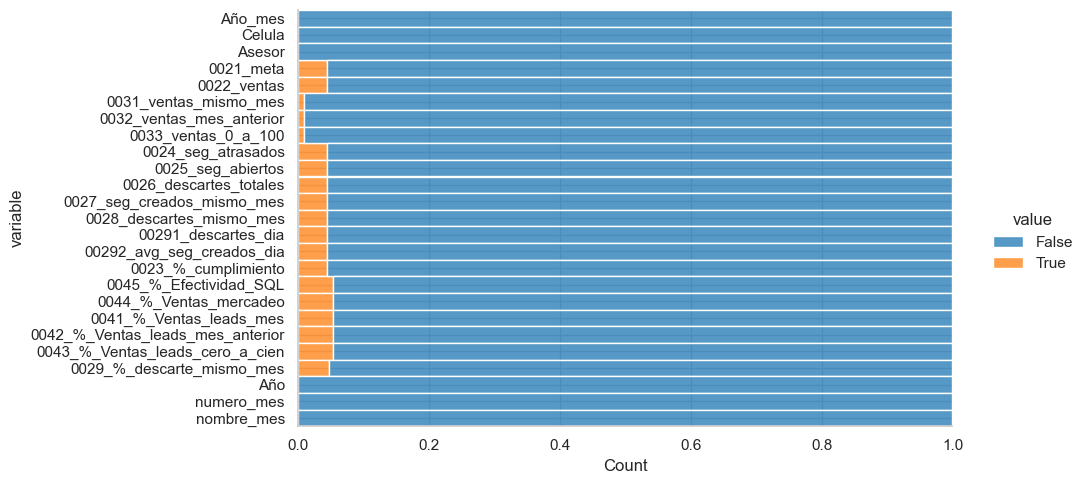

In [397]:
(
    df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
);

### Visualización valores nulos por cada fila

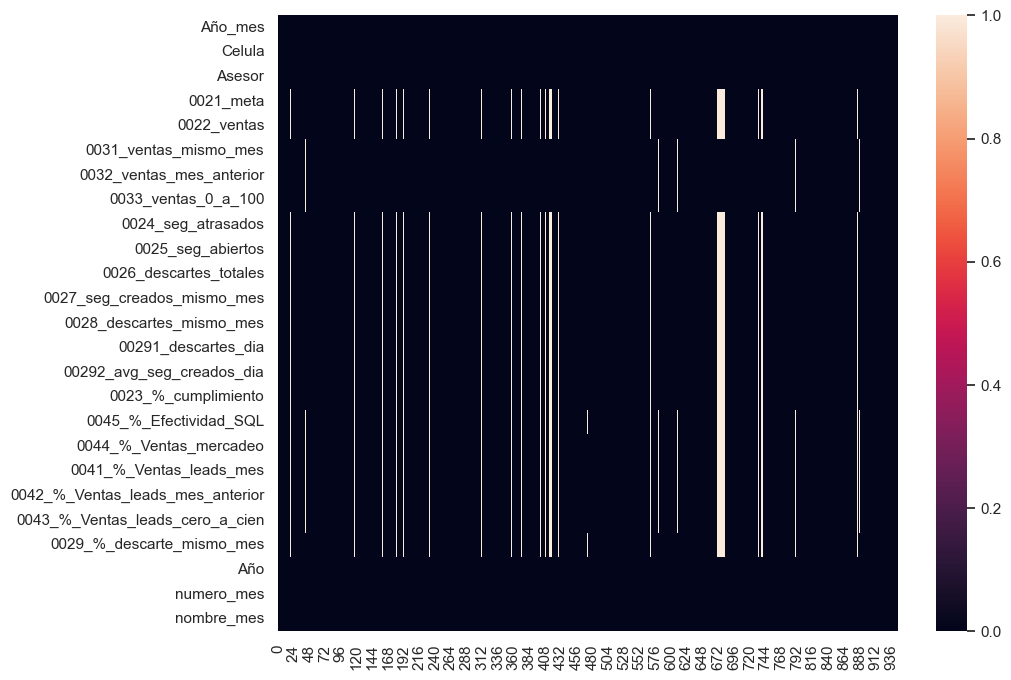

In [398]:
(
    df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
            )
        )
    )
);

La proporción de valores `NaN` es muy pequeña en comparación con el dataset, podemos ver que la mayoria se encuentra en las columnas que continen `Seg` y estos son `Leads` creados en el CRM. Por lo tanto, para fines prácticos del ejercicio vamos a eliminarlos, ya que el impacto en nuestro análisis va a ser mínimo.

### Eliminando valores nulos

In [399]:
# inplace permite que los cambios sean permanentes
df.dropna(inplace=True)

In [400]:
df.isnull().sum()

Año_mes                             0
Celula                              0
Asesor                              0
0021_meta                           0
0022_ventas                         0
0031_ventas_mismo_mes               0
0032_ventas_mes_anterior            0
0033_ventas_0_a_100                 0
0024_seg_atrasados                  0
0025_seg_abiertos                   0
0026_descartes_totales              0
0027_seg_creados_mismo_mes          0
0028_descartes_mismo_mes            0
00291_descartes_dia                 0
00292_avg_seg_creados_dia           0
0023_%_cumplimiento                 0
0045_%_Efectividad_SQL              0
0044_%_Ventas_mercadeo              0
0041_%_Ventas_leads_mes             0
0042_%_Ventas_leads_mes_anterior    0
0043_%_Ventas_leads_cero_a_cien     0
0029_%_descarte_mismo_mes           0
Año                                 0
numero_mes                          0
nombre_mes                          0
dtype: int64

In [401]:
df.to_excel('./Dataset/dataset.xlsx', index=False)
df.to_csv('./Dataset/dataset.csv', index=False)

### Descripción de las variables númericas

In [402]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Año_mes,895.0,202106.427933,3.535550,202101.0000,202103.00000,202106.0000,202110.0000,202112.0000
0021_meta,895.0,55.808939,19.068765,10.0000,47.00000,55.0000,77.0000,83.0000
0022_ventas,895.0,36.622346,15.074251,2.0000,26.00000,36.0000,46.0000,100.0000
0031_ventas_mismo_mes,895.0,15.327374,7.889695,1.0000,10.00000,14.0000,20.0000,52.0000
0032_ventas_mes_anterior,895.0,3.227933,2.731354,0.0000,1.00000,3.0000,4.0000,25.0000
0033_ventas_0_a_100,895.0,6.957542,4.396509,0.0000,4.00000,6.0000,9.0000,31.0000
0024_seg_atrasados,895.0,3.852514,8.359413,0.0000,0.00000,1.0000,3.0000,78.0000
0025_seg_abiertos,895.0,37.071508,17.043746,0.0000,25.00000,35.0000,47.0000,103.0000
0026_descartes_totales,895.0,72.720670,43.347333,2.0000,42.00000,62.0000,90.0000,271.0000
0027_seg_creados_mismo_mes,895.0,76.256983,30.949748,1.0000,53.50000,72.0000,95.0000,211.0000


Los cuartiles nos ayudarán más adelante para poder realizar filtros y así crear un modelo de segmentación de asesores Alto, Medio y Bajo de algunos indicadores claves

### Descripción de las variables Object

In [403]:
df.describe(include='object').T

,count,unique,top,freq
Celula,895,6,DG1,161
Asesor,895,109,A34,12
nombre_mes,895,12,febrero,83


### Rango de las variables

In [404]:
df.max(numeric_only=True) - df.min(numeric_only=True)

Año_mes                              11.0000
0021_meta                            73.0000
0022_ventas                          98.0000
0031_ventas_mismo_mes                51.0000
0032_ventas_mes_anterior             25.0000
0033_ventas_0_a_100                  31.0000
0024_seg_atrasados                   78.0000
0025_seg_abiertos                   103.0000
0026_descartes_totales              269.0000
0027_seg_creados_mismo_mes          210.0000
0028_descartes_mismo_mes            174.0000
00291_descartes_dia                  22.0000
00292_avg_seg_creados_dia            10.0000
0023_%_cumplimiento                   2.4949
0045_%_Efectividad_SQL                0.9834
0044_%_Ventas_mercadeo                0.9583
0041_%_Ventas_leads_mes               0.9583
0042_%_Ventas_leads_mes_anterior      0.3750
0043_%_Ventas_leads_cero_a_cien       0.6667
0029_%_descarte_mismo_mes             0.9388
Año                                   0.0000
numero_mes                           11.0000
dtype: flo

## Análisis exploratorio

### Ventas periodo 2021

In [405]:
ventas = df.groupby(['nombre_mes', 'numero_mes'])['0022_ventas'].sum().reset_index()
ventas = ventas.sort_values(by='numero_mes')

meta = df.groupby(['nombre_mes', 'numero_mes'])['0021_meta'].sum().reset_index()
meta = meta.sort_values(by='numero_mes')

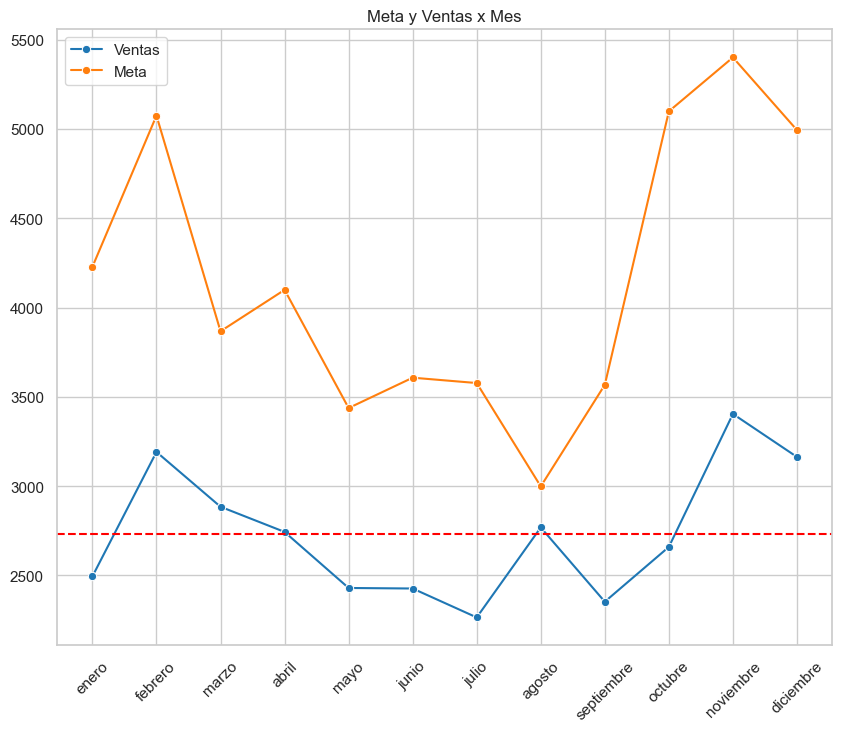

In [406]:
avg_ventas = ventas['0022_ventas'].mean()
avg_meta = meta['0021_meta'].mean()

sns.lineplot(
    x=ventas['nombre_mes'],
    y=ventas['0022_ventas'],
    marker='o',
    label='Ventas'
)

sns.lineplot(
    x=ventas['nombre_mes'],
    y=meta['0021_meta'],
    marker='o',
    label='Meta'
)

plt.axhline(y=avg_ventas, linestyle='--', color='r', label='Promedio Ventas')

plt.xlabel('')
plt.ylabel('')
plt.title('Meta y Ventas x Mes')
plt.xticks(rotation=45)
plt.show()

### Top 3 meses con mayor ventas

In [407]:
top_3_mes_ventas = df.groupby('nombre_mes')['0022_ventas'].sum().sort_values(ascending=False).reset_index().head(3)
print(top_3_mes_ventas)

  nombre_mes  0022_ventas
0  noviembre       3404.0
1    febrero       3191.0
2  diciembre       3163.0


<AxesSubplot:xlabel='nombre_mes', ylabel='0022_ventas'>

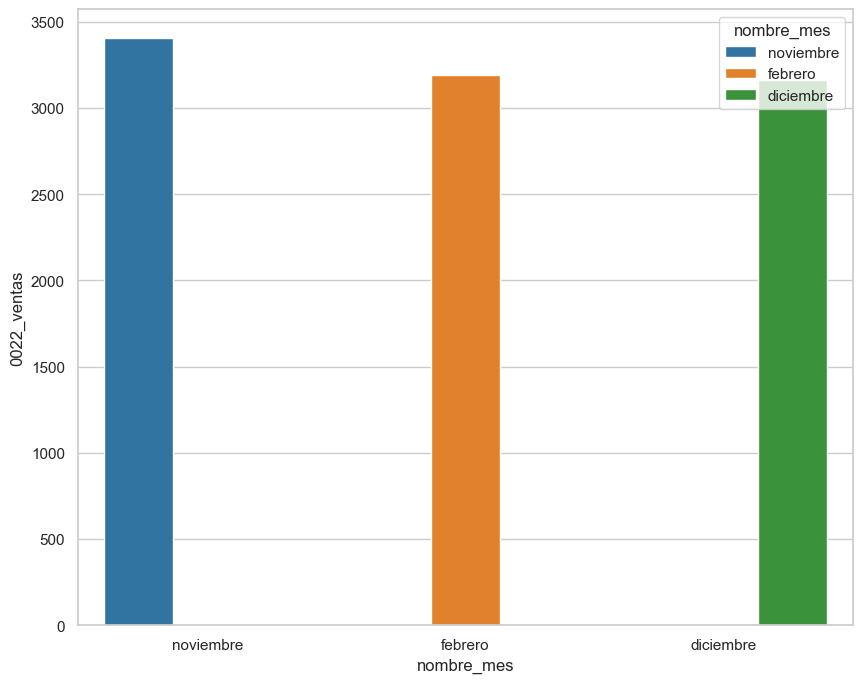

In [408]:
sns.barplot(
    data=top_3_mes_ventas,
    x='nombre_mes',
    y='0022_ventas',
    hue='nombre_mes'
)

### ¿Cuál celula es la que más vende?

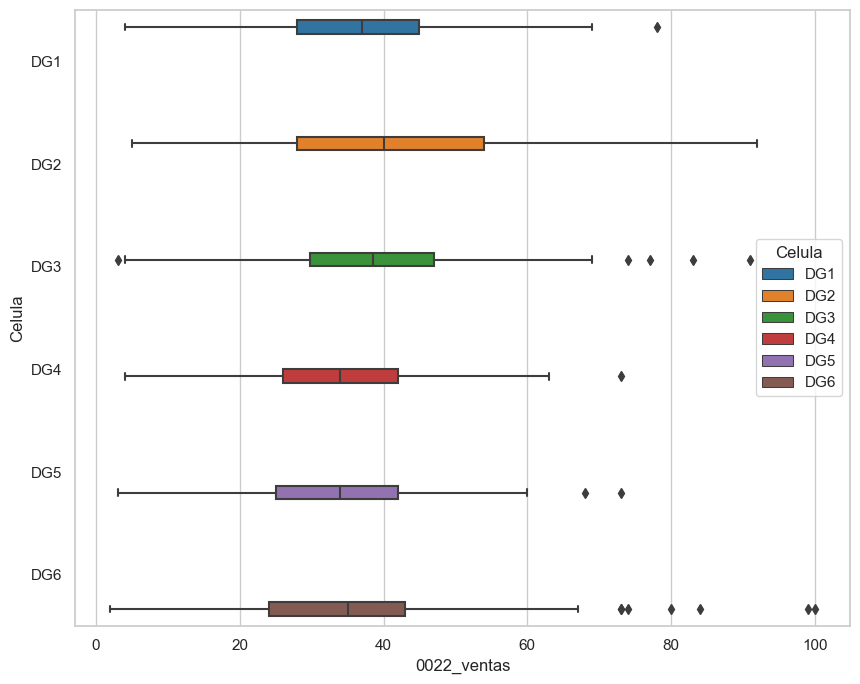

In [409]:
sns.boxplot(
    data=df,
    x='0022_ventas',
    y='Celula',
    hue='Celula'
);

### ¿Cuál celula tiene el mayor cumplimiento?

<AxesSubplot:xlabel='0023_%_cumplimiento', ylabel='Celula'>

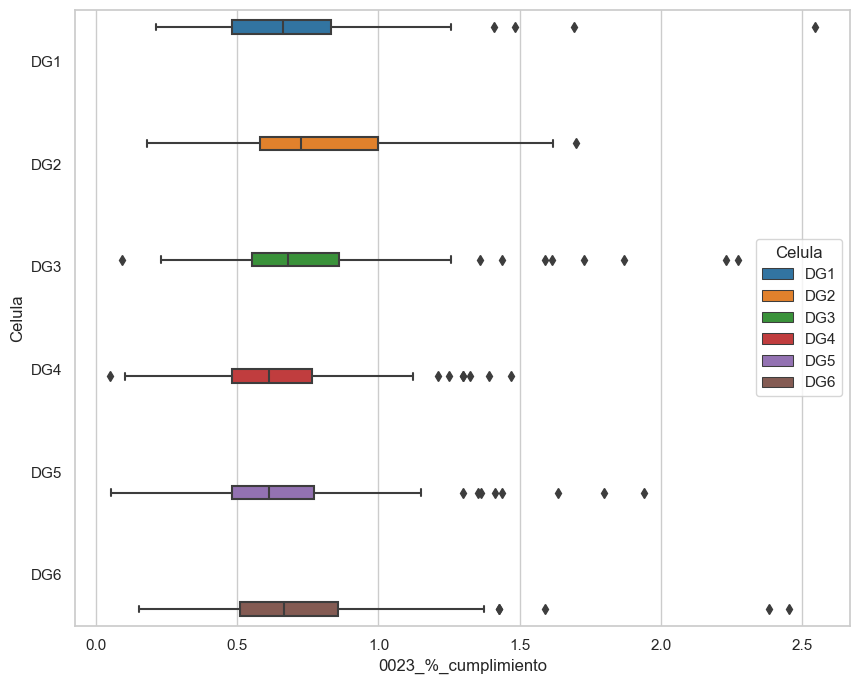

In [410]:
sns.boxplot(
    data=df,
    x='0023_%_cumplimiento',
    y='Celula',
    hue='Celula'
)

La celula DG2 es la que más vende y la que tiene mayor cumplimiento de cuota.

### Correlaciones de variables

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_23936\1031133750.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df.iloc[:,1:15].corr(),


<AxesSubplot:>

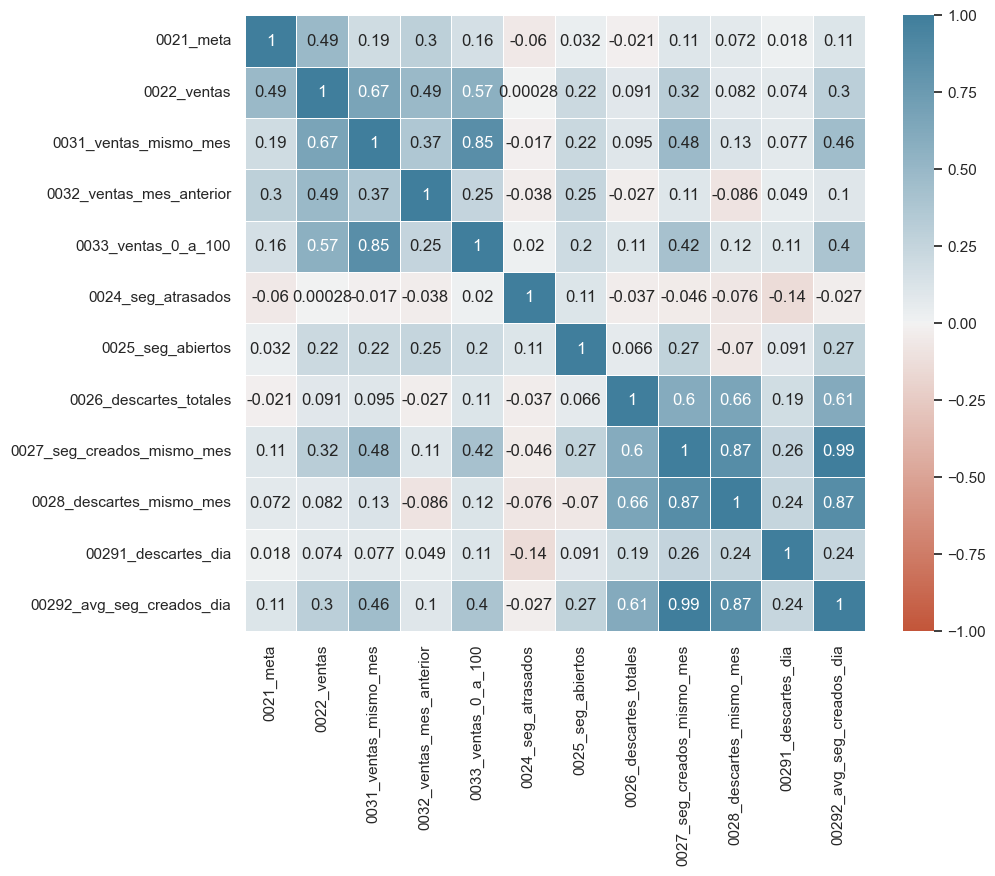

In [411]:
sns.heatmap(
    data=df.iloc[:,1:15].corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

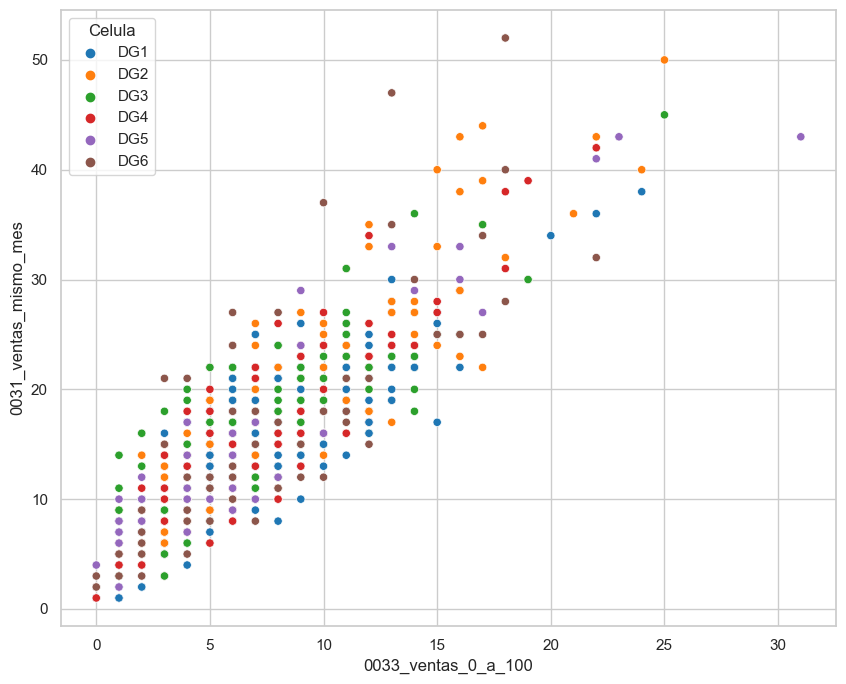

In [412]:
sns.scatterplot(
    data=df,
    x='0033_ventas_0_a_100',
    y='0031_ventas_mismo_mes',
    hue='Celula'
);

Existe una relación positiva fuerte entre estas dos variables demostrando que los Leads que proporciona el area de mercadeo son muy buenos, impactando de manera positiva las habilidades de los asesores de cerrar la venta el mismo día

## Análisis último periodo del año 2021 mes Diciembre

### Proporciones 

In [517]:
grupo = df.groupby('nombre_mes')[['0022_ventas','0031_ventas_mismo_mes','0033_ventas_0_a_100','0025_seg_abiertos']].sum().reset_index()
grupo

,nombre_mes,0022_ventas,0031_ventas_mismo_mes,0033_ventas_0_a_100,0025_seg_abiertos
0,abril,2743.0,1029.0,443.0,3174.0
1,agosto,2768.0,1382.0,632.0,2493.0
2,diciembre,3163.0,1258.0,661.0,2552.0
3,enero,2494.0,1108.0,453.0,2838.0
4,febrero,3191.0,1329.0,595.0,2503.0
5,julio,2264.0,1048.0,446.0,2673.0
6,junio,2426.0,910.0,427.0,3149.0
7,marzo,2884.0,1237.0,546.0,2655.0
8,mayo,2429.0,974.0,473.0,3318.0
9,noviembre,3404.0,1335.0,584.0,2838.0


In [474]:
grupo = df.groupby('nombre_mes')[['0022_ventas','0031_ventas_mismo_mes','0033_ventas_0_a_100','0025_seg_abiertos']].sum().reset_index()


# Proporcion ventas
proporcion_ventas_dic = df[df['nombre_mes'] == 'diciembre']['0022_ventas'].sum() / avg_ventas


# Proporcion ventas mismo mes
ventas_mismo_mes = df.groupby('nombre_mes')['0031_ventas_mismo_mes'].sum().reset_index()
proporcion_ventas_mismo_mes = df[df['nombre_mes'] == 'diciembre']['0031_ventas_mismo_mes'].sum() / grupo['0031_ventas_mismo_mes'].mean()


# Proporcion ventas 0 a 100
ventas_0_100 = df.groupby('nombre_mes')['0033_ventas_0_a_100'].sum().reset_index()
proporcion_ventas_0_100 = df[df['nombre_mes'] == 'diciembre']['0033_ventas_0_a_100'].sum() / grupo['0033_ventas_0_a_100'].mean()


# Proporcin seg abiertos
seg_abiertos = df.groupby('nombre_mes')['0025_seg_abiertos'].sum().reset_index()
proporcion_seg_abiertos = df[df['nombre_mes'] == 'diciembre']['0025_seg_abiertos'].sum() / grupo['0025_seg_abiertos'].mean()


print(f'Proporcion ventas -> {proporcion_ventas_dic}\nProporcion ventas mismo mes -> {proporcion_ventas_mismo_mes}\nProporcion ventas 0 a 100 -> {proporcion_ventas_0_100}\nProporcion seg abiertos -> {proporcion_seg_abiertos}')

Proporcion ventas -> 1.1580071391524545
Proporcion ventas mismo mes -> 1.1004519609272487
Proporcion ventas 0 a 100 -> 1.273807612012205
Proporcion seg abiertos -> 0.9229934597184967


,nombre_mes,0022_ventas,0031_ventas_mismo_mes,0033_ventas_0_a_100,0025_seg_abiertos
2,diciembre,3163.0,1258.0,661.0,2552.0


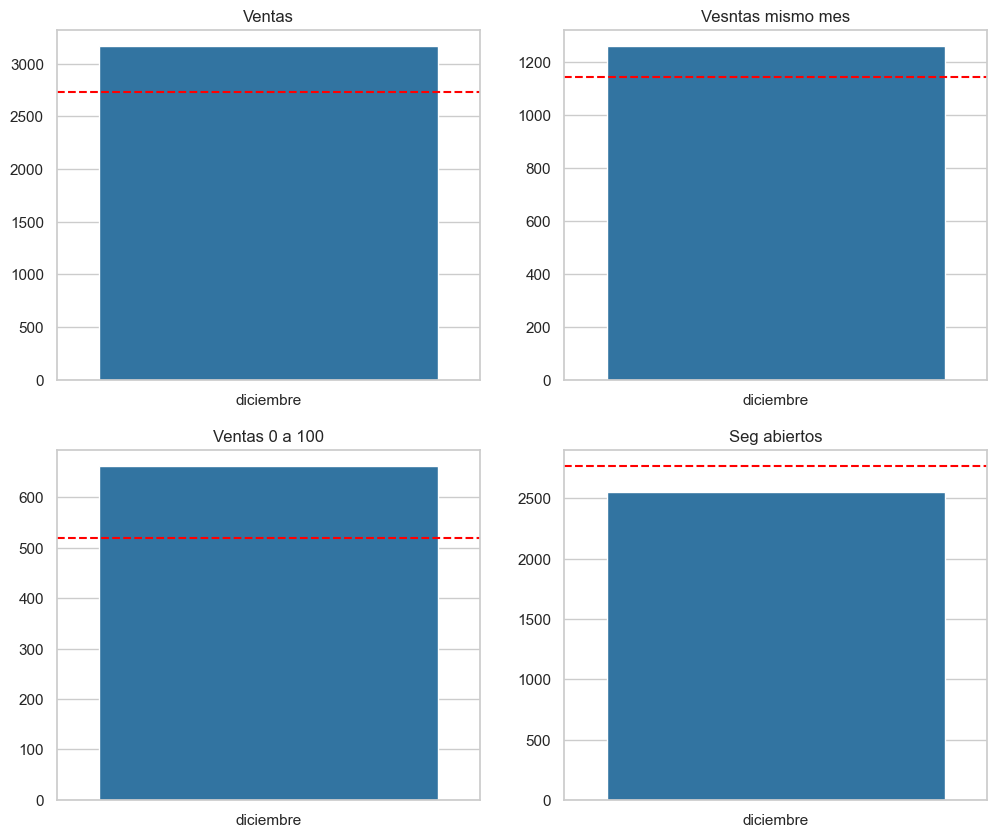

In [521]:
grupo_dic = df.groupby('nombre_mes')[['0022_ventas','0031_ventas_mismo_mes','0033_ventas_0_a_100','0025_seg_abiertos']].sum().reset_index()
grupo_dic = grupo[grupo['nombre_mes'] == 'diciembre']
grupo

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(
    data=grupo_dic,
    x='nombre_mes',
    y='0022_ventas',
    ax=axs[0,0]
)
axs[0,0].set_title('Ventas')
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('')
axs[0,0].axhline(y=avg_ventas, linestyle='--', color='r', label='promedio ventas totales')

sns.barplot(
    data=grupo_dic,
    x='nombre_mes',
    y='0031_ventas_mismo_mes',
    ax=axs[0,1]
)
axs[0,1].set_title('Vesntas mismo mes')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')
axs[0,1].axhline(y=grupo['0031_ventas_mismo_mes'].mean(), linestyle='--', color='r', label='promedio ventas mismo mes')


sns.barplot(
    data=grupo_dic,
    x='nombre_mes',
    y='0033_ventas_0_a_100',
    ax=axs[1,0]
)
axs[1,0].set_title('Ventas 0 a 100')
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('')
axs[1,0].axhline(y=grupo['0033_ventas_0_a_100'].mean(), linestyle='--', color='r', label='promedio ventas 0 a 100')


sns.barplot(
    data=grupo_dic,
    x='nombre_mes',
    y='0025_seg_abiertos',
    ax=axs[1,1]
)
axs[1,1].set_title('Seg abiertos')
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('')
axs[1,1].axhline(y=grupo['0025_seg_abiertos'].mean(), linestyle='--', color='r', label='promedio ventas 0 a 100')

grupo_dic

El mes de diciembre se caracteriza por estar por encima de la media de sus indicadores

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_23936\1998431461.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ventas_mes = df.groupby('nombre_mes').sum().reset_index()


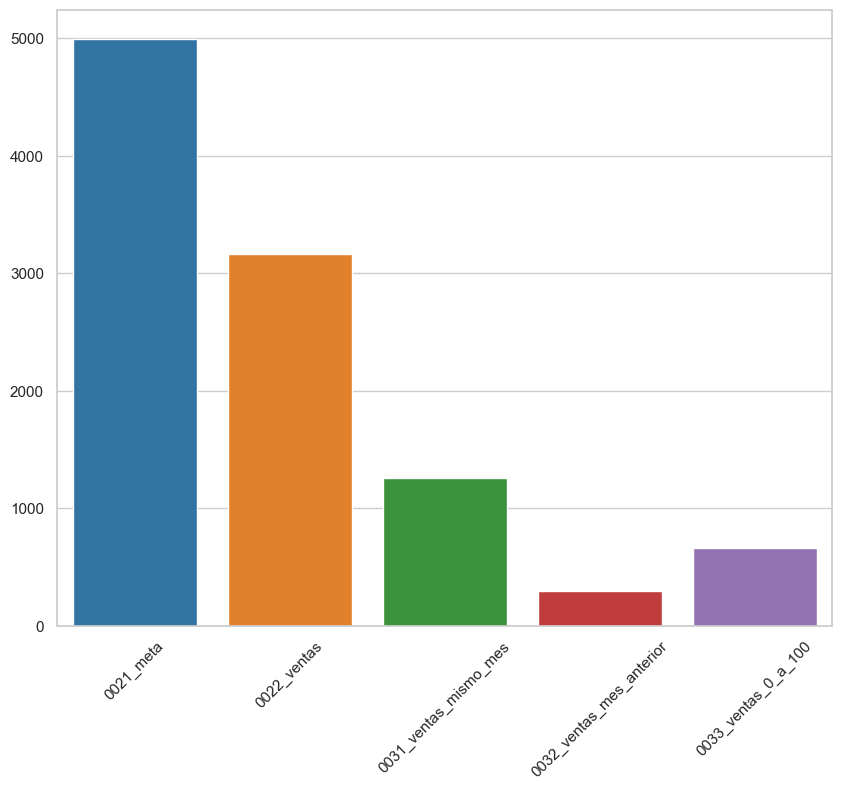

In [415]:
ventas_mes = df.groupby('nombre_mes').sum().reset_index()

ventas_diciembre = ventas_mes[ventas_mes['nombre_mes'] == 'diciembre']

ventas_diciembre = ventas_diciembre.iloc[:,2:7]

g = sns.barplot(
    data=ventas_diciembre
)

plt.xticks(rotation=45)
plt.show()

## Modelo Alto Medio Bajo

### Modelo Alto

In [ ]:
filtro = df[
    (df['0023_%_cumplimiento'] >= 0.75) &
    (df['0044_%_Ventas_mercadeo'] >= 0.57) &
    (df['0041_%_Ventas_leads_mes'] >= 0.48) &
    (df['0043_%_Ventas_leads_cero_a_cien'] >= 0.21) &
    (df['0045_%_Efectividad_SQL'] >= 0.23)
]

alto = filtro.groupby(['Celula','Asesor']).sum()

alto.iloc[:,1:-2]

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_23936\3924686478.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  alto = filtro.groupby(['Celula','Asesor']).sum()


0021_meta  0022_ventas  0031_ventas_mismo_mes  \
Celula Asesor                                                  
DG1    A1           33.0         31.0                   21.0   
       A16          47.0         40.0                   24.0   
       A44          47.0         36.0                   22.0   
       A71         235.0        233.0                  135.0   
       A77          95.0         86.0                   66.0   
DG2    A107         95.0        100.0                   71.0   
       A11          50.0         40.0                   29.0   
       A29          40.0         45.0                   39.0   
       A34          50.0         56.0                   33.0   
       A38         102.0        110.0                   75.0   
       A45         426.0        446.0                  271.0   
       A58          17.0         22.0                   12.0   
       A68          47.0         76.0                   43.0   
       A9           11.0         16.0                   10.0   
DG3    A103         80.0         70.0                   48.0   
       A27          11.0         19.0                   16.0   
       A36          55.0         59.0                   30.0   
       A5           11.0         25.0                   17.0   
       A72          23.0         25.0                   14.0   
       A98         104.0        107.0                   63.0   
DG4    A21          47.0         52.0                   29.0   
       A32          23.0         20.0                   18.0   
       A39          47.0         50.0                   34.0   
       A79          57.0         44.0                   27.0   
       A81          62.0         47.0                   26.0   
       A83         227.0        243.0                  150.0   
       A84          47.0         36.0                   23.0   
DG5    A31          37.0         69.0                   47.0   
       A34         194.0        184.0                  116.0   
       A36         104.0        104.0                   56.0   
       A50          47.0         46.0                   33.0   
       A79          47.0         36.0                   29.0   
       A91          22.0         24.0                   16.0   
DG6    A109         40.0         31.0                   22.0   
       A16         105.0         91.0                   60.0   
       A22         104.0        115.0                   62.0   
       A65         154.0        132.0                   88.0   
       A76          66.0         60.0                   41.0   

               0032_ventas_mes_anterior  0033_ventas_0_a_100  \
Celula Asesor                                                  
DG1    A1                           1.0                  8.0   
       A16                          4.0                 14.0   
       A44                          5.0                  8.0   
       A71                         30.0                 81.0   
       A77                          5.0                 28.0   
DG2    A107                         8.0                 35.0   
       A11                          3.0                 16.0   
       A29                          1.0                 17.0   
       A34                          3.0                 12.0   
       A38                         16.0                 28.0   
       A45                         44.0                141.0   
       A58                          2.0                  6.0   
       A68                          6.0                 22.0   
       A9                           1.0                  6.0   
DG3    A103                         6.0                 22.0   
       A27                          1.0                  9.0   
       A36                          5.0                 19.0   
       A5                           0.0                  6.0   
       A72                          4.0                  7.0   
       A98                         13.0                 28.0   
DG4    A21                          5.0       

### Modelo Medio

In [ ]:
filtro = df[
    (df['0023_%_cumplimiento'] < 0.75) &
    (df['0023_%_cumplimiento'] >= 0.585) &
    (df['0044_%_Ventas_mercadeo'] < 0.57) &
    (df['0044_%_Ventas_mercadeo'] >= 0.45) &
    (df['0041_%_Ventas_leads_mes'] < 0.48) &
    (df['0041_%_Ventas_leads_mes'] >= 0.39) &
    (df['0043_%_Ventas_leads_cero_a_cien'] < 0.21) &
    (df['0043_%_Ventas_leads_cero_a_cien'] < 0.15) &
    (df['0045_%_Efectividad_SQL'] < 0.23) &
    (df['0045_%_Efectividad_SQL'] >= 0.17)
]

medio = filtro.groupby(['Celula','Asesor']).sum()

medio.iloc[:,1:-2]

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_23936\3083049175.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medio = filtro.groupby(['Celula','Asesor']).sum()


,,0021_meta,0022_ventas,0031_ventas_mismo_mes,0032_ventas_mes_anterior,0033_ventas_0_a_100,0024_seg_atrasados,0025_seg_abiertos,0026_descartes_totales,0027_seg_creados_mismo_mes,0028_descartes_mismo_mes,00291_descartes_dia,00292_avg_seg_creados_dia,0023_%_cumplimiento,0045_%_Efectividad_SQL,0044_%_Ventas_mercadeo,0041_%_Ventas_leads_mes,0042_%_Ventas_leads_mes_anterior,0043_%_Ventas_leads_cero_a_cien,0029_%_descarte_mismo_mes
Celula,Asesor,,,,,,,,,,,,,,,,,,,
DG1,A34,57.0,38.0,16.0,2.0,3.0,0.0,27.0,81.0,83.0,47.0,4.0,3.8,0.6667,0.1928,0.4737,0.4211,0.0526,0.0789,0.5663
DG2,A96,47.0,31.0,14.0,3.0,2.0,0.0,22.0,46.0,61.0,26.0,1.0,2.9,0.6596,0.2295,0.5484,0.4516,0.0968,0.0645,0.4262
DG3,A6,77.0,47.0,22.0,3.0,6.0,0.0,22.0,109.0,108.0,68.0,0.0,5.4,0.6104,0.2037,0.5319,0.4681,0.0638,0.1277,0.6296
DG4,A46,55.0,34.0,14.0,3.0,5.0,0.0,32.0,197.0,68.0,35.0,6.0,3.4,0.6182,0.2059,0.5000,0.4118,0.0882,0.1471,0.5147


### Modelo Bajo

In [ ]:
filtro = df[
    (df['0023_%_cumplimiento'] < 0.585) &
    (df['0044_%_Ventas_mercadeo'] < 0.45) &
    (df['0041_%_Ventas_leads_mes'] < 0.39) &
    (df['0043_%_Ventas_leads_cero_a_cien'] < 0.15) &
    (df['0045_%_Efectividad_SQL'] < 0.17)
]

bajo = filtro.groupby(['Celula','Asesor']).sum()

bajo.iloc[:,1:-2]

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_23936\4015644983.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bajo = filtro.groupby(['Celula','Asesor']).sum()


0021_meta  0022_ventas  0031_ventas_mismo_mes  \
Celula Asesor                                                  
DG1    A101         79.0         43.0                    6.0   
       A26         120.0         35.0                    7.0   
       A37         195.0         88.0                   17.0   
       A67          47.0         16.0                    2.0   
       A73          19.0          4.0                    1.0   
       A8           77.0         35.0                    3.0   
       A99          79.0         34.0                    7.0   
DG2    A24          77.0         32.0                    7.0   
       A96         166.0         63.0                   14.0   
DG3    A12          62.0         34.0                    9.0   
       A73          57.0         30.0                    6.0   
       A75         162.0         77.0                   16.0   
       A89          70.0         37.0                   13.0   
DG4    A110        139.0         79.0                   22.0   
       A21          83.0         42.0                    8.0   
       A28         102.0         50.0                    5.0   
       A43          77.0          8.0                    1.0   
       A46          50.0         28.0                    5.0   
       A47          97.0         35.0                    9.0   
       A54          55.0         29.0                    7.0   
       A84         105.0         43.0                   13.0   
       A99          62.0         27.0                    8.0   
DG5    A12         131.0         69.0                   18.0   
       A50          79.0         38.0                    8.0   
       A55         154.0         73.0                   18.0   
       A79          79.0         26.0                    7.0   
DG6    A109         79.0         30.0                    7.0   
       A13          77.0         36.0                    9.0   
       A41          55.0         28.0                    6.0   
       A56         145.0         56.0                   11.0   
       A75         168.0         88.0                   18.0   
       A87         127.0         59.0                   13.0   

               0032_ventas_mes_anterior  0033_ventas_0_a_100  \
Celula Asesor                                                  
DG1    A101                         5.0                  2.0   
       A26                          2.0                  2.0   
       A37                          1.0                  9.0   
       A67                          1.0                  2.0   
       A73                          0.0                  0.0   
       A8                           4.0                  2.0   
       A99                          0.0                  4.0   
DG2    A24                          0.0                  4.0   
       A96                          3.0                  3.0   
DG3    A12                          5.0                  5.0   
       A73                          3.0                  2.0   
       A75                          9.0                  7.0   
       A89                          2.0                  4.0   
DG4    A110                         6.0                  6.0   
       A21                          4.0                  2.0   
       A28                          1.0                  2.0   
       A43                          1.0                  0.0   
       A46                          7.0                  1.0   
       A47                          2.0                  3.0   
       A54                          4.0                  3.0   
       A84                          6.0                  3.0   
       A99                          3.0                  4.0   
DG5    A12                          2.0                  8.0   
       A50                          4.0                  2.0   
       A55                          8.0                  7.0   
       A79                          4.0                  2.0   
DG6    A109                         4.0       

### Conclusión del modelo

1- La celula `DG2` tiene la mayor cantidad de asesores que se destacan por tener indicadores que superan las metas planteadas. 

2- La celula `DG4` tiene la mayor cantidad de asesores que destacan por tener indicadores muy malos, se observa que tienen metas demasiado amplias en comparación a sus ventas concretadas.